<a href="https://colab.research.google.com/github/CyberMaryVer/detectron-doc/blob/master/Detectron2_Tutorial_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectron2 Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">



https://github.com/facebookresearch/detectron2

>[Detectron2 Tutorial](#scrollTo=QHnVupBBn9eR)

>[Installation](#scrollTo=vM54r6jlKTII)

>[Inference for image](#scrollTo=Vk4gID50K03a)

>>[How to work with outputs](#scrollTo=cAO1i_BxnHVI)

>[Train with dataset in COCO format](#scrollTo=RjB_GYRQyinN)

>>[Train!](#scrollTo=wlqXIXXhW8dA)

>>[Inference & evaluation using the trained model](#scrollTo=0e4vdDIOXyxF)

>[Example of different keypoint model](#scrollTo=oKBbjnLw5GGG)

>[Inference for video](#scrollTo=hiXadAb9Fv-L)

>>[Let's make it work with Google Colab](#scrollTo=gdnPMrMPG02n)

>>[Restart](#scrollTo=yYbeqfFiYrD-)

>>[Keypoints](#scrollTo=4w3xYsqUI4kF)

>[Output example](#scrollTo=FKXz-oXIYgUv)



# Installation

!Note: detectron2 at the moment doesn't work with torch 1.8, you need to downgrade torch to 1.7

In [2]:
!pip install pyyaml==5.1
!gcc --version

# opencv is pre-installed on colab. install in case of use with different env
# !pip install opencv-python

# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
# import torch
# assert torch.__version__.startswith("1.7")

!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# !pip install -U 'git+https://github.com/facebookresearch/iopath'
!pip install torch==1.7.1 torchvision==0.8.2

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

     |████████████████████████████████| 276kB 7.2MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=775a4c8d54dc905d0a2e129b67b9f553e74c18b18a73d2d1eebd489d970eb022
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.8MB 5.0MB/s 
     |████████████████████████████████| 2.2MB 7.2MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
  Created wheel for fvcore: filename=f

     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 246kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
1.7.1 True


In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



# Inference for image

In [2]:
# download input image
!wget https://sarajevo.travel/assets/photos/events/original/balkan-health-amp-fitness-summit-1540381827.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [3]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")) # we can change the path here
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml") # we can change the path here
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_a6e10b.pkl: 237MB [00:03, 71.7MB/s]                           
/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


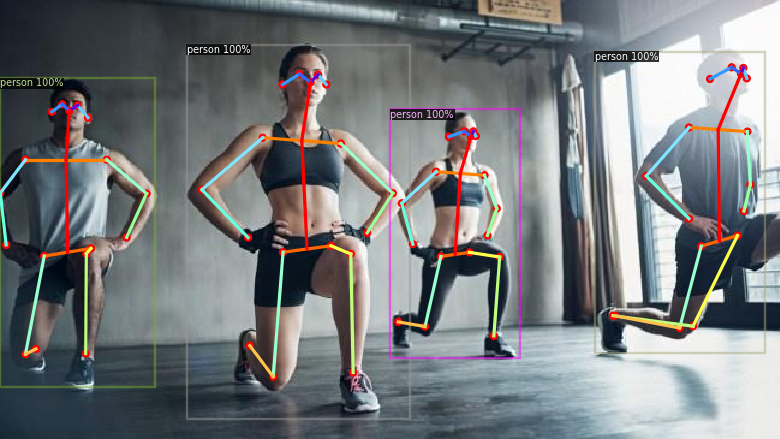

In [4]:
outputs = predictor(im)
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

## How to work with outputs

In [6]:
MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).keypoint_names

('nose',
 'left_eye',
 'right_eye',
 'left_ear',
 'right_ear',
 'left_shoulder',
 'right_shoulder',
 'left_elbow',
 'right_elbow',
 'left_wrist',
 'right_wrist',
 'left_hip',
 'right_hip',
 'left_knee',
 'right_knee',
 'left_ankle',
 'right_ankle')

In [5]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
keypoint_dict = {}
for i in zip(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).keypoint_names, outputs["instances"].pred_keypoints[0]):
  keypoint_dict.update({i[0]: i[1][:2,]})

keypoint_dict

{'left_ankle': tensor([294.2911, 310.6245], device='cuda:0'),
 'left_ear': tensor([271.9121,  70.6430], device='cuda:0'),
 'left_elbow': tensor([327.3730, 161.1837], device='cuda:0'),
 'left_eye': tensor([265.1011,  62.3678], device='cuda:0'),
 'left_hip': tensor([275.8041, 204.9937], device='cuda:0'),
 'left_knee': tensor([292.3451, 211.8085], device='cuda:0'),
 'left_shoulder': tensor([284.0746, 119.8076], device='cuda:0'),
 'left_wrist': tensor([305.9671, 194.2846], device='cuda:0'),
 'nose': tensor([258.7766,  68.6959], device='cuda:0'),
 'right_ankle': tensor([208.1806, 288.2327], device='cuda:0'),
 'right_ear': tensor([235.4246,  70.6430], device='cuda:0'),
 'right_elbow': tensor([168.2876, 158.2630], device='cuda:0'),
 'right_eye': tensor([249.5331,  61.8810], device='cuda:0'),
 'right_hip': tensor([235.9111, 210.3482], device='cuda:0'),
 'right_knee': tensor([227.6406, 314.0319], device='cuda:0'),
 'right_shoulder': tensor([218.8836, 114.9398], device='cuda:0'),
 'right_wrist':

In [ ]:
MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).keypoint_connection_rules

[('left_ear', 'left_eye', (102, 204, 255)),
 ('right_ear', 'right_eye', (51, 153, 255)),
 ('left_eye', 'nose', (102, 0, 204)),
 ('nose', 'right_eye', (51, 102, 255)),
 ('left_shoulder', 'right_shoulder', (255, 128, 0)),
 ('left_shoulder', 'left_elbow', (153, 255, 204)),
 ('right_shoulder', 'right_elbow', (128, 229, 255)),
 ('left_elbow', 'left_wrist', (153, 255, 153)),
 ('right_elbow', 'right_wrist', (102, 255, 224)),
 ('left_hip', 'right_hip', (255, 102, 0)),
 ('left_hip', 'left_knee', (255, 255, 77)),
 ('right_hip', 'right_knee', (153, 255, 204)),
 ('left_knee', 'left_ankle', (191, 255, 128)),
 ('right_knee', 'right_ankle', (255, 195, 77))]

In [ ]:
test = outputs["instances"].pred_keypoints[0]

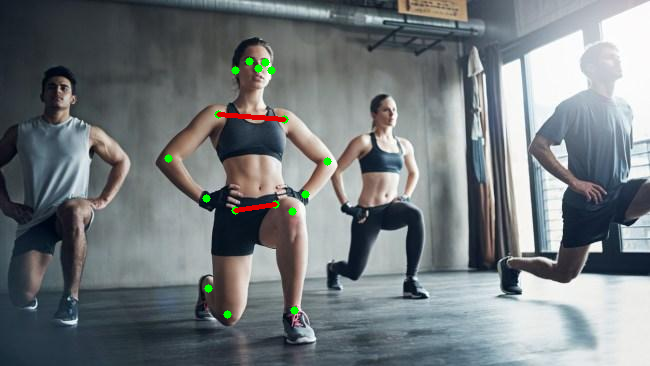

In [ ]:
import cv2

def get_vector(x1, y1, x2, y2):
  return np.array([[int(x1),int(y1), 0],[int(x2),int(y2), 0]])

# extract and draw keypoints - example
image = np.asarray(im.copy())
for i in test:
  image = cv2.circle(image.astype(np.float64), (i[0],i[1]), radius=4, color=(0, 255, 0), thickness=-1)
 
# draw lines - example
x1,y1 = keypoint_dict["left_shoulder"]
x2,y2 = keypoint_dict["right_shoulder"]
vs = get_vector(x1, y1, x2, y2)
image = cv2.line(image, (x1, y1), (x2, y2), (0, 0, 225), thickness=4)

x1,y1 = keypoint_dict["left_hip"]
x2,y2 = keypoint_dict["right_hip"]
vh = get_vector(x1, y1, x2, y2)
image = cv2.line(image, (x1, y1), (x2, y2), (0, 0, 225), thickness=4)

cv2_imshow(image)

In [ ]:
vh, vs

(array([[275, 204,   0],
        [235, 210,   0]]), array([[284, 119,   0],
        [218, 114,   0]]))

In [ ]:
# check if lines are parallel - example
# !pip install vg
import vg

print(vg.almost_collinear(vh, vs))
vg.angle(vh, vs)

False


array([13.8343255 , 14.17783816])

# Train with dataset in COCO format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

annFile='/content/drive/MyDrive/datasets/annotations/coco_person.json'
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


In [ ]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(" ".join(nms)))

COCO categories: 
person



In [ ]:
# if your dataset is in COCO format, this cell can be replaced by the following three lines:
from detectron2.data.datasets import register_coco_instances

path_to_json = '/content/drive/MyDrive/datasets/annotations/coco_person.json'
path_to_img = '/content/drive/MyDrive/datasets/coco_person/'
register_coco_instances("my_dataset_train", {}, path_to_json, path_to_img)
# register_coco_instances("my_dataset_test", {}, path_to_json, path_to_img)

## Train!

Now, let's fine-tune a COCO-pretrained R50-FPN Mask R-CNN model on the balloon dataset. It takes ~6 minutes to train 300 iterations on Colab's K80 GPU, or ~2 minutes on a P100 GPU.


In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[03/10 12:14:48 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

[03/10 12:14:48 d2.engine.train_loop]: Starting training from iteration 0
[03/10 12:15:17 d2.utils.events]:  eta: 0:06:57  iter: 19  total_loss: 1.97  loss_cls: 0.6292  loss_box_reg: 0.6423  loss_mask: 0.689  loss_rpn_cls: 0.0004125  loss_rpn_loc: 0.003555  time: 1.4733  data_time: 0.0244  lr: 4.9953e-06  max_mem: 3319M
[03/10 12:15:46 d2.utils.events]:  eta: 0:06:23  iter: 39  total_loss: 1.857  loss_cls: 0.5604  loss_box_reg: 0.6332  loss_mask: 0.6777  loss_rpn_cls: 0.0003829  loss_rpn_loc: 0.003127  time: 1.4573  data_time: 0.0070  lr: 9.9902e-06  max_mem: 3319M
[03/10 12:16:15 d2.utils.events]:  eta: 0:05:50  iter: 59  total_loss: 1.748  loss_cls: 0.4518  loss_box_reg: 0.6453  loss_mask: 0.653  loss_rpn_cls: 0.0004969  loss_rpn_loc: 0.003469  time: 1.4525  data_time: 0.0079  lr: 1.4985e-05  max_mem: 3319M
[03/10 12:16:44 d2.utils.events]:  eta: 0:05:23  iter: 79  total_loss: 1.562  loss_cls: 0.3488  loss_box_reg: 0.5926  loss_mask: 0.6257  loss_rpn_cls: 0.0003978  loss_rpn_loc: 0.0

## Inference & evaluation using the trained model
Now, let's run inference with the trained model on the balloon validation dataset. First, let's create a predictor using the model we just trained:



In [ ]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

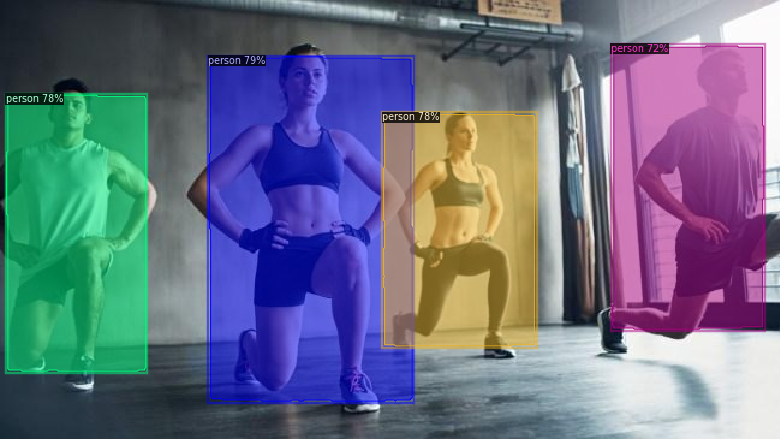

In [ ]:
outputs = predictor(im)
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# Example of different keypoint model

In [ ]:
# Inference with a keypoint detection model - different keypoint model
cfg = get_cfg()   # get a fresh new config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_5ad38f.pkl: 491MB [00:15, 31.8MB/s]                           


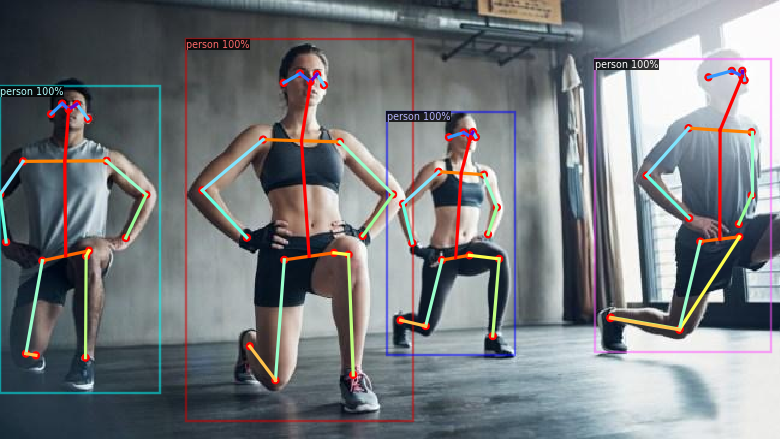

In [ ]:
im = cv2.imread("input.jpg")
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# Convert model >> Caffee >> ONNX

First, we need to build the model from our configuration

In [ ]:
from detectron2.modeling import build_model

model = build_model(cfg)  # returns a torch.nn.Module

Next we need install onnx module and transform the model into caffe format and then into onnx format

In [ ]:
!pip install onnx

     |████████████████████████████████| 14.5MB 236kB/s 


In [ ]:
import onnx
from detectron2.export import Caffe2Tracer
from torchvision import transforms

tran = transforms.ToTensor()  # Convert the numpy array or PIL.Image read image to (C, H, W) Tensor format and /255 normalize to [0, 1.0]
img_tensor = tran(im)
tracer = Caffe2Tracer(cfg, model, [{"image": img_tensor}])
caffe2_traced = tracer.export_caffe2()

[03/16 13:22:39 d2.export.caffe2_export]: Exporting a Caffe2GeneralizedRCNN model via ONNX ... Some warnings from ONNX are expected and are usually not to worry about.


/usr/local/lib/python3.7/dist-packages/torch/onnx/utils.py:258: UserWarning: `add_node_names' can be set to True only when 'operator_export_type' is `ONNX`. Since 'operator_export_type' is not set to 'ONNX', `add_node_names` argument will be ignored.
  "`{}` argument will be ignored.".format(arg_name, arg_name))
/usr/local/lib/python3.7/dist-packages/torch/onnx/utils.py:258: UserWarning: `do_constant_folding' can be set to True only when 'operator_export_type' is `ONNX`. Since 'operator_export_type' is not set to 'ONNX', `do_constant_folding` argument will be ignored.
  "`{}` argument will be ignored.".format(arg_name, arg_name))
/usr/local/lib/python3.7/dist-packages/detectron2/export/c10.py:31: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert tensor.dim() == 2 an

[03/16 13:22:54 d2.export.caffe2_export]: ONNX export Done. Exported predict_net (before optimizations):
| type                   | input                                                                                                                                               | output                                     |
|:-----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------|
| AliasWithName          | ['data']                                                                                                                                            | ['322']                                    |
| AliasWithName          | ['im_info.1']                                                                                                                                       | ['im_info']                                |
| Sub  

In [ ]:
type(model), type(caffe2_traced)

(detectron2.modeling.meta_arch.rcnn.GeneralizedRCNN,
 detectron2.export.api.Caffe2Model)

In [ ]:
!mkdir models

In [ ]:
caffe2_traced.save_protobuf('model')

[03/16 13:28:22 d2.export.api]: Saving model to model ...


In [ ]:
caffe2_traced.save_graph('/model/graph.svg')

In [ ]:
onnx_model = tracer.export_onnx()
onnx.save(onnx_model, "model.onnx")

/usr/local/lib/python3.7/dist-packages/torch/onnx/utils.py:258: UserWarning: `add_node_names' can be set to True only when 'operator_export_type' is `ONNX`. Since 'operator_export_type' is not set to 'ONNX', `add_node_names` argument will be ignored.
  "`{}` argument will be ignored.".format(arg_name, arg_name))
/usr/local/lib/python3.7/dist-packages/torch/onnx/utils.py:258: UserWarning: `do_constant_folding' can be set to True only when 'operator_export_type' is `ONNX`. Since 'operator_export_type' is not set to 'ONNX', `do_constant_folding` argument will be ignored.
  "`{}` argument will be ignored.".format(arg_name, arg_name))
/usr/local/lib/python3.7/dist-packages/detectron2/export/c10.py:31: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert tensor.dim() == 2 an

# Test converted model

In [ ]:
onnx_model = onnx.load("model.onnx")
onnx.checker.check_model(onnx_model)

In [ ]:
!pip install onnxruntime

     |████████████████████████████████| 4.1MB 11.1MB/s 


https://github.com/facebookresearch/detectron2/issues/1868

>>> 

*Export the model to ONNX format. Note that the exported model contains custom ops only available in caffe2, therefore it cannot be directly executed by other runtime (such as onnxruntime or TensorRT). Post-processing or transformation passes may be applied on the model to accommodate different runtimes, but we currently do not provide support for them.*

In [ ]:
# import onnxruntime

# ort_session = onnxruntime.InferenceSession("model.onnx")

# def t_to_numpy(tensor):
#     return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# # compute ONNX Runtime output prediction
# ort_inputs = {ort_session.get_inputs()[0].name: t_to_numpy(x)}
# ort_outs = ort_session.run(None, ort_inputs)

# # compare ONNX Runtime and PyTorch results
# np.testing.assert_allclose(to_numpy(torch_out), ort_outs[0], rtol=1e-03, atol=1e-05)

# print("Exported model has been tested with ONNXRuntime")

# Tensorrt

Now we can try run onnx model with tensorrt or openvino back

In [ ]:
# !pip install tensorrt
# import tensorrt as trt

In [ ]:
%%bash
wget https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb

dpkg -i nvidia-machine-learning-repo-*.deb
apt-get update

sudo apt-get install libnvinfer5

Selecting previously unselected package nvidia-machine-learning-repo-ubuntu1804.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb ...
Unpacking nvidia-machine-learning-repo-ubuntu1804 (1.0.0-1) ...
Setting up nvidia-machine-learning-repo-ubuntu1804 (1.0.0-1) ...
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:9 http://developer.download.nvidia.com/

--2021-03-16 13:43:31--  https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.20.126
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.20.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2926 (2.9K) [application/x-deb]
Saving to: ‘nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb’

     0K ..                                                    100%  128M=0s

2021-03-16 13:43:31 (128 MB/s) - ‘nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb’ saved [2926/2926]

W: Target Packages (Packages) is configured multiple times in /etc/apt/sources.list.d/nvidia-machine-learning.list:1 and /etc/apt/sources.list.d/nvidia-ml.list:1
W: Target Packages (Packages) is configured multiple times in /etc/apt/sources.list.d/nvidia-machine-learning.list:1 and

In [ ]:
# check TensorRT version
print("TensorRT version: ")
!dpkg -l | grep nvinfer

TensorRT version: 
ii  libnvinfer5                             5.1.5-1+cuda10.1                    amd64        TensorRT runtime libraries


In [ ]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt

# TRT_LOGGER = trt.Logger(trt.Logger.VERBOSE)
# flags = 1 << (int)(trt.NetworkDefinitionCreationFlag.EXPLICIT_BATCH)

# Inference for video

We will be using this one

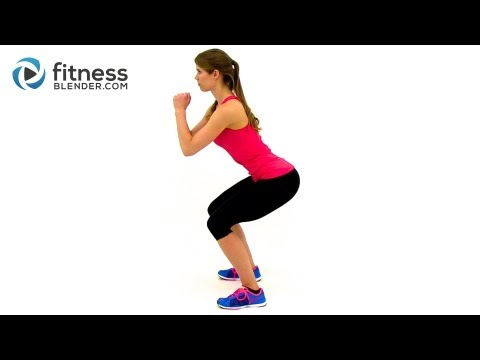

In [ ]:
# This is the video we're going to process
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("mGvzVjuY8SY", width=500)
display(video)

In [ ]:
# Install dependencies, download the video, and crop 10 seconds for processing
!pip install youtube-dl
!youtube-dl https://www.youtube.com/watch?v=mGvzVjuY8SY -f 22 -o video2.mp4
!ffmpeg -i video2.mp4 -ss 00:00:47 -t 10 -c:v copy video-clip2.mp4

[youtube] mGvzVjuY8SY: Downloading webpage
[download] Destination: video2.mp4
[download] 100% of 29.63MiB in 00:01
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis -

## Let's make it work with Google Colab

To avoid some technical issues we have to uninstall some libraries first (like in official tutorial)

In [ ]:
!pip uninstall opencv-python opencv-python-headless opencv-contrib-python

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/opencv_contrib_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-contrib-python-4.1.2.30


In my case Google Colab after that couldn't import cv2 module (python3-opencv was installed). I fixed it by installing opencv-python library. 

In [ ]:
# !pip install opencv-python-headless opencv-contrib-python
!pip install opencv-python

     |████████████████████████████████| 50.4MB 67kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


## Restart

In [ ]:
!apt install python3-opencv

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-numpy python3-opencv
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,477 kB of archives.
After this operation, 13.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [534 kB]
Fetched 2,477 kB in 2s (1,034 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1%3a1.13.3-2ubuntu1_amd64.deb ...
Unpacking python3-numpy (1:1.13.3-2ubuntu1) ...
Selecting 

In [ ]:
# Run frame-by-frame inference demo on this video (takes 3-4 minutes) with the "demo.py" tool we provided in the repo.
!git clone https://github.com/facebookresearch/detectron2

Cloning into 'detectron2'...
remote: Enumerating objects: 266, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 11143 (delta 150), reused 129 (delta 85), pack-reused 10877
Receiving objects: 100% (11143/11143), 4.57 MiB | 13.69 MiB/s, done.
Resolving deltas: 100% (8043/8043), done.


This is another issue I encountered. The module could not work with mp4 extension due to the license limitations. To avoid this we need change one line in the code of demo.py file.

Reference: https://www.swiftlane.com/blog/generating-mp4s-using-opencv-python-with-the-avc1-codec/

In [ ]:
!grep -rl "fourcc=cv2.VideoWriter_fourcc" /content/detectron2/demo/demo.py | xargs sed -i 's/x264/mp4v/g'

In [ ]:
!cat "fourcc=cv2.VideoWriter_fourcc" /content/detectron2/demo/demo.py

cat: 'fourcc=cv2.VideoWriter_fourcc': No such file or directory
# Copyright (c) Facebook, Inc. and its affiliates.
import argparse
import glob
import multiprocessing as mp
import os
import time
import cv2
import tqdm

from detectron2.config import get_cfg
from detectron2.data.detection_utils import read_image
from detectron2.utils.logger import setup_logger

from predictor import VisualizationDemo

# constants
WINDOW_NAME = "COCO detections"


def setup_cfg(args):
    # load config from file and command-line arguments
    cfg = get_cfg()
    # To use demo for Panoptic-DeepLab, please uncomment the following two lines.
    # from detectron2.projects.panoptic_deeplab import add_panoptic_deeplab_config  # noqa
    # add_panoptic_deeplab_config(cfg)
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    # Set score_threshold for builtin models
    cfg.MODEL.RETINANET.SCORE_THRESH_TEST = args.confidence_threshold
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = args.con

## Keypoints

weights are here: 

[detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl](https://)

In [ ]:
!python detectron2/demo/demo.py --config-file detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml --video-input video-clip2.mp4 --confidence-threshold 0.5 --output video-output2.mp4 \
--opts MODEL.WEIGHTS detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[03/03 12:58:44 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl'], output='video-output2.mp4', video_input='video-clip2.mp4', webcam=False)
[03/03 12:58:47 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl
[03/03 12:58:47 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
  0% 0/271 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi

In [ ]:
!ffmpeg -i video-output2.mp4 -t 5 -c copy output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

# Output example

In [ ]:
from IPython.display import HTML
from base64 import b64encode

# Input video path
save_path = "/content/output.mp4"
# Compressed video path
compressed_path = "/content/output_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Run loop

In [ ]:
from time import time
i = 0
start_time = time()
while True:
  try:
    i += 1
    if i%1000000 == 0:
      if i%100000000 == 0:
        end = '\n'
      else:
        end = ''
      print('.', end=end)

  except KeyboardInterrupt:
    print('\nInterrupted by user')
    print(f'total i: {i}\ntotal time: {time()-start_time:.2f}')
    break

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.........................................................
Interrupted by user
total i: 857204369
total time: 112.63
